In [1]:
pip install ultralytics==8.0.196 --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import glob
from IPython.display import Image, display
from IPython import display

display.clear_output()

In [3]:
!nvidia-smi

Wed Feb  7 03:50:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          Off | 00000000:04:00.0 Off |                   On |
| N/A   44C    P0              81W / 300W |                  N/A |     N/A      Default |
|                                         |                      |              Enabled |
+-----------------------------------------+----------------------+--

In [4]:
HOME = os.getcwd()
print(HOME)

/home/jovyan/ChordDetectionV3


In [5]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
!mkdir {HOME}/datasets
%cd {HOME}/datasets


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu118 CUDA:0 (NVIDIA A100 80GB PCIe MIG 3g.40gb, 40192MiB)
Setup complete ✅ (120 CPUs, 503.6 GB RAM, 821.3/8125.3 GB disk)


/home/jovyan/ChordDetectionV3/datasets


In [7]:
!pwd

/home/jovyan/ChordDetectionV3/datasets


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d8rLXJ1ddjGeTh84Cspo")
project = rf.workspace("school-sps5k").project("chorddetection2.2")
dataset = project.version(1).download("yolov8")


Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ChordDetection2.2-1 in yolov8:: 100%|██████████| 5290/5290 [00:05<00:00, 989.53it/s] 


In [9]:
%cd {dataset.location}

/home/jovyan/ChordDetectionV3/datasets/ChordDetection2.2-1


In [10]:
## Custom training

In [10]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=150 imgsz=640 save=true

/home/jovyan/ChordDetectionV3
100%|█████████████████████████████████████████| 131M/131M [00:01<00:00, 111MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu118 CUDA:0 (NVIDIA A100 80GB PCIe MIG 3g.40gb, 40192MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/jovyan/ChordDetectionV3/datasets/ChordDetection2.2-1/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

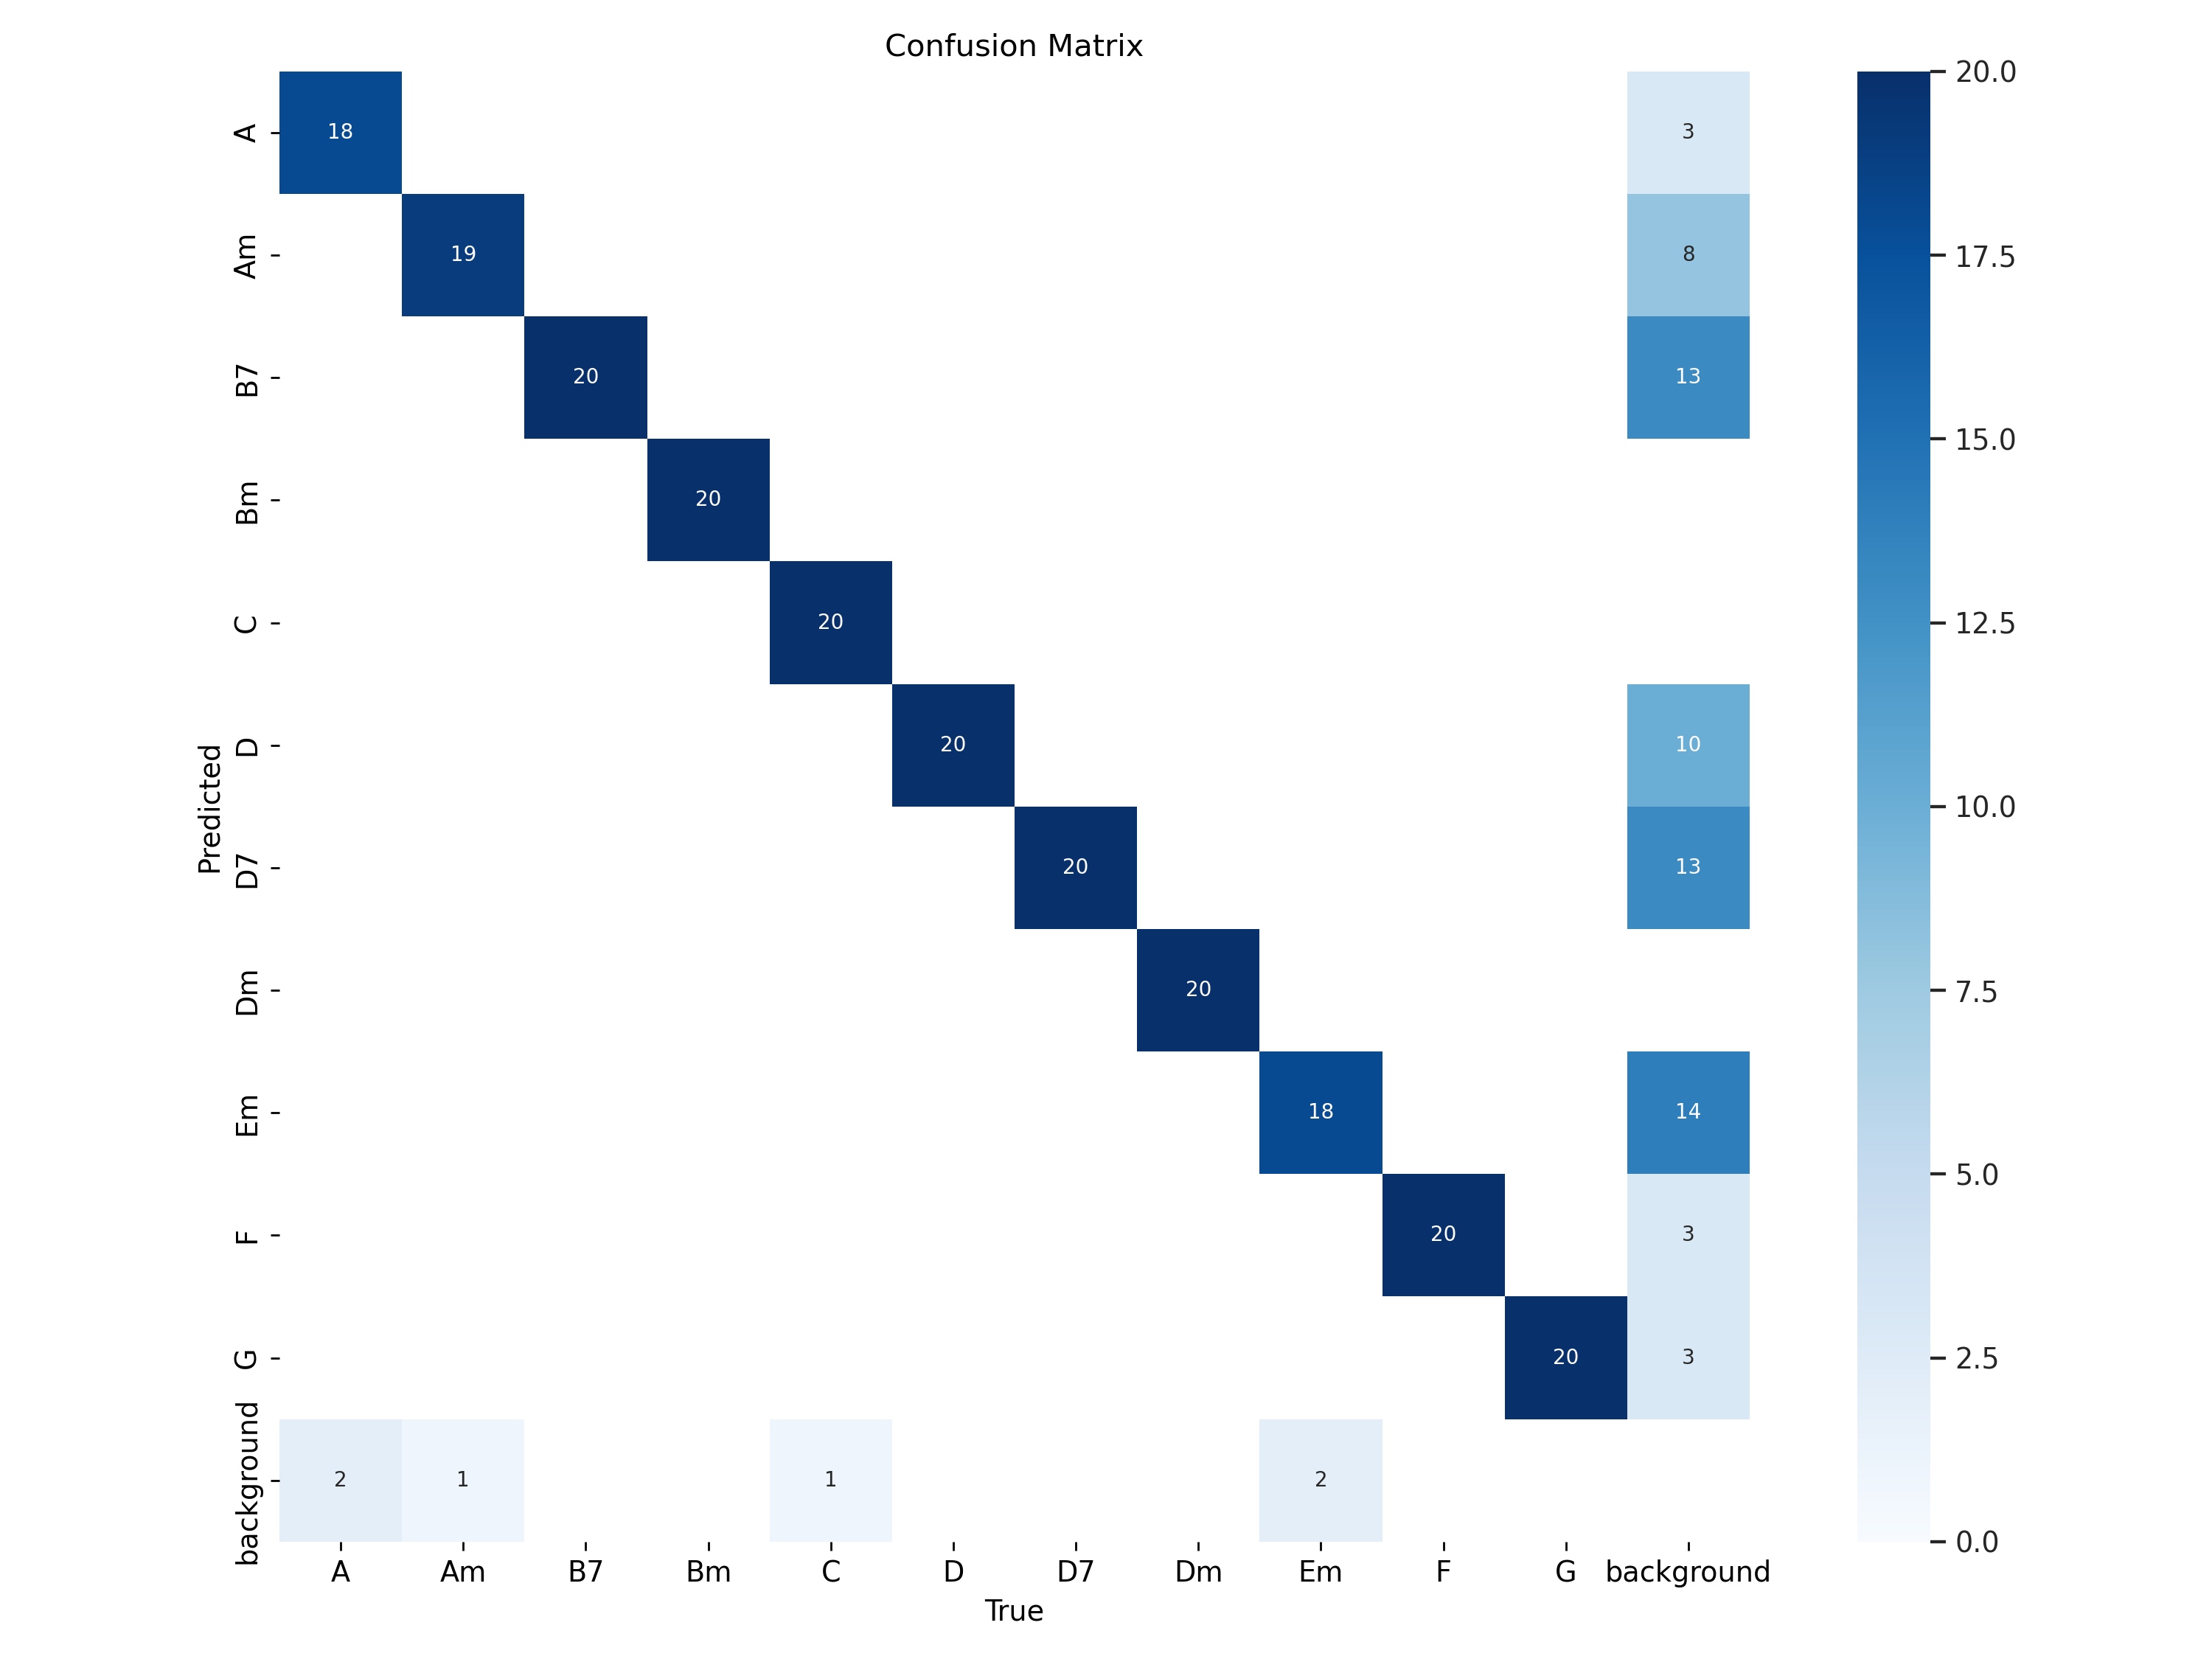

In [11]:
Image(filename=f'runs/detect/train/confusion_matrix.png',width=600)

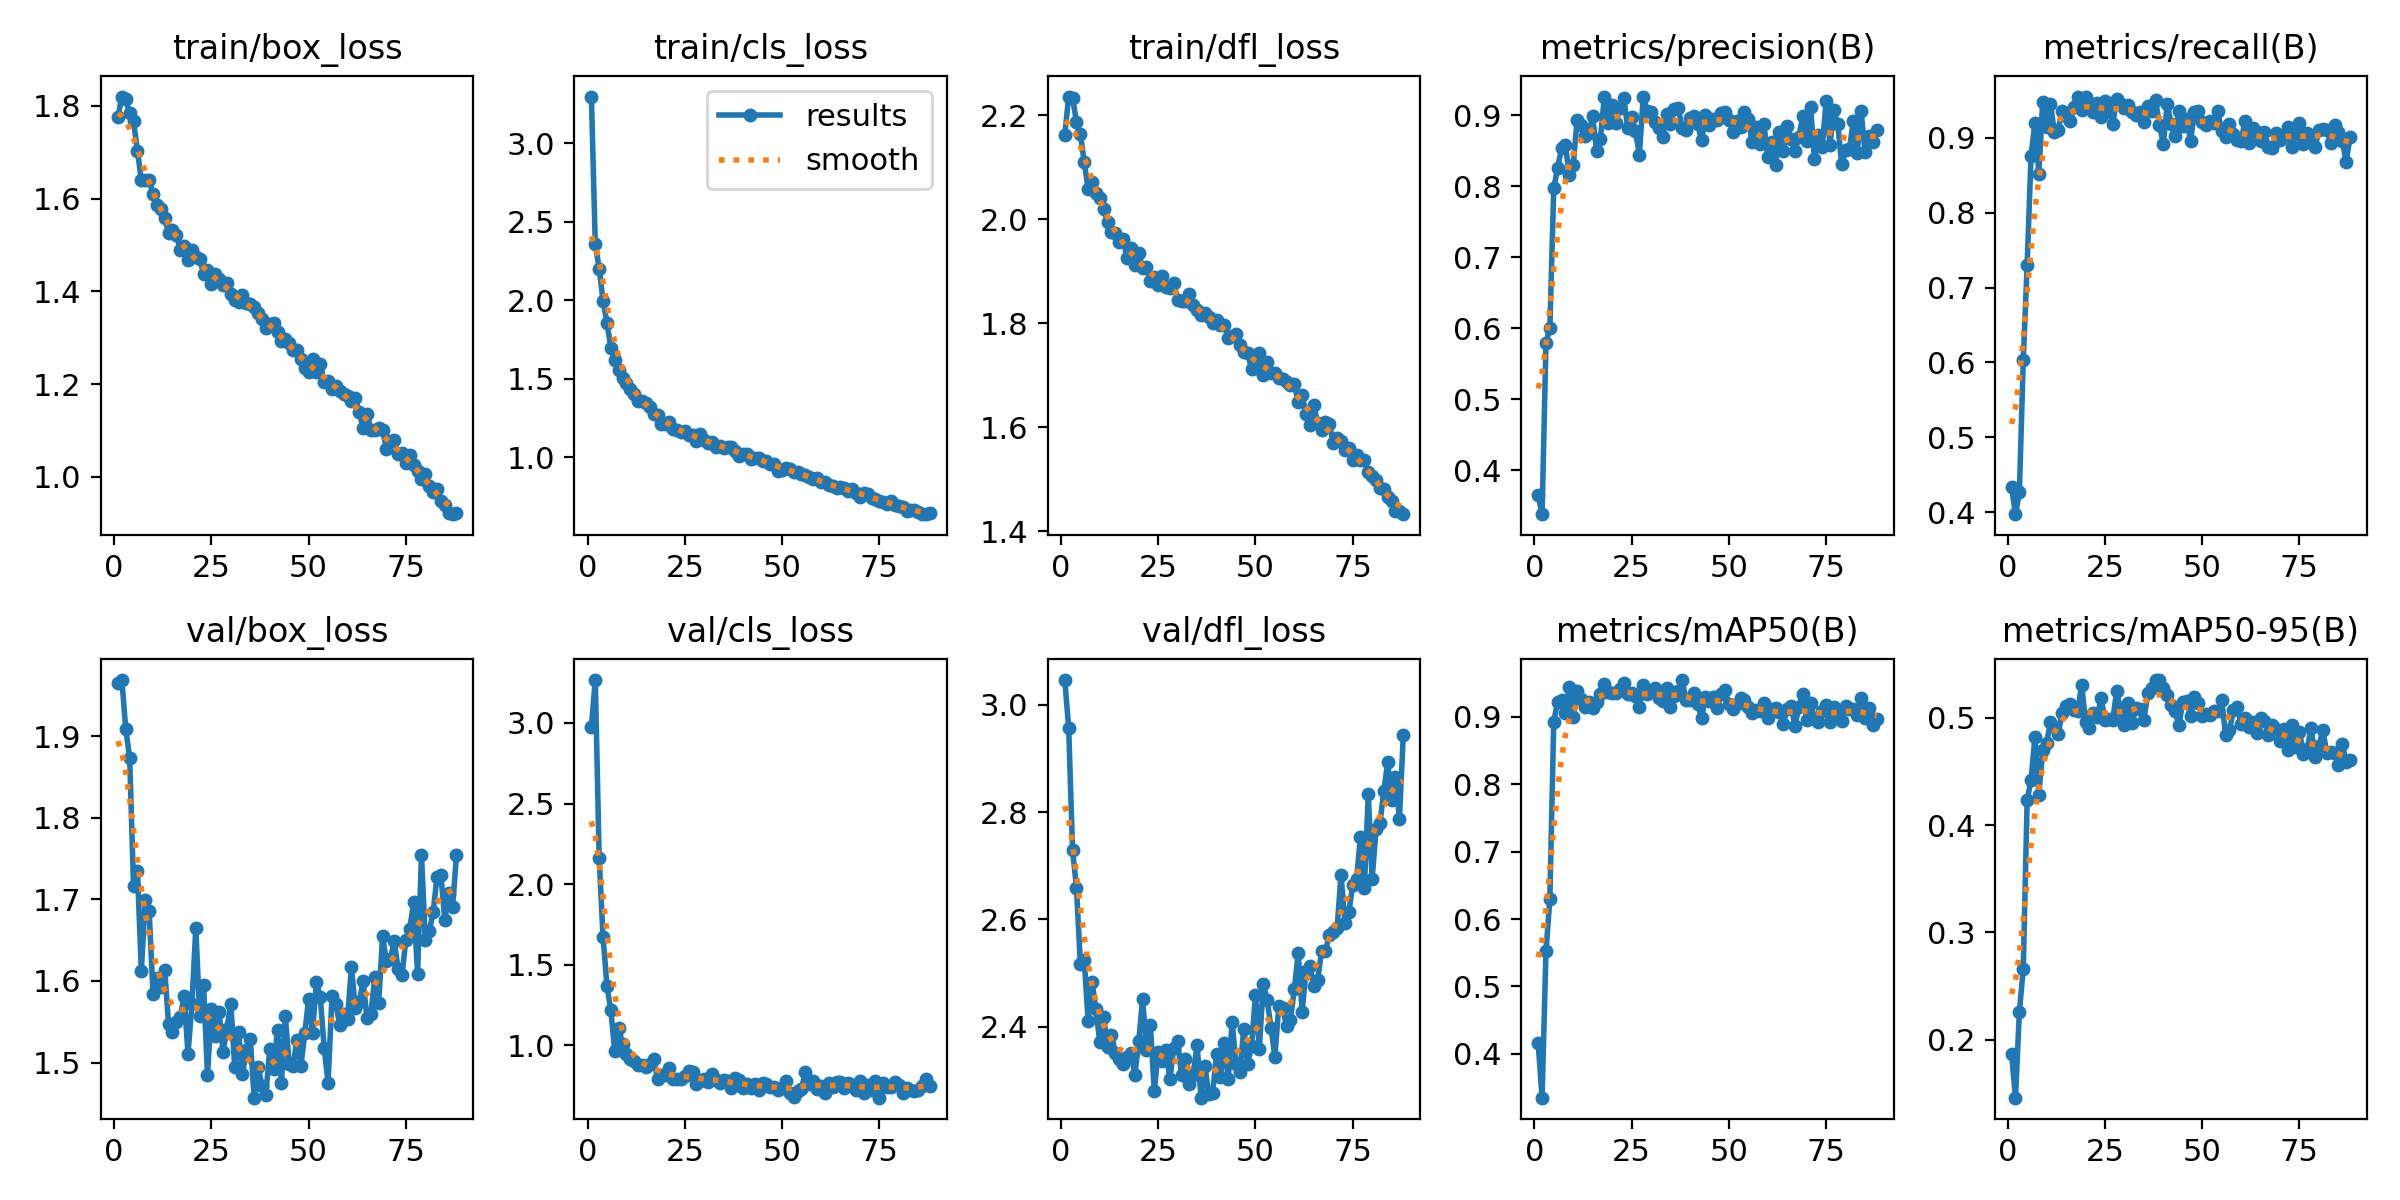

In [12]:
Image(filename=f'runs/detect/train/results.png',width=600)

In [ ]:
# !yolo task=segment mode=predict model=runs/segment/train12/weights/best.pt conf=0.25 source= save=true

In [14]:
# extract the best model from
# ChordDetectionInstanceV2/runs/segment/train{X}/weights/best.pt
